#Assignment 1
We start this notebook by downloading the necessary python packages and importing our chosen dataset:



In [ ]:
import pandas as pd # Is used for data manipulation
import numpy as np # Is used for numerical operations
import matplotlib.pyplot as plt # Is uded for data visualization.
from scipy import stats # Imports statistical functions
import seaborn as sns # Is used for advanced data visualization

xlsx= 'https://github.com/Cheide20/assignments/raw/main/DatabankWide.xlsx'
data = pd.read_excel(xlsx) # Reads the Excel file into a DataFrame using pandas.
data.head() #Displays the first five rows of the dataset

,Country name,Country code,Year,Adult populaiton,Region,Income group,Account (% age 15+),Financial institution account (% age 15+),First financial institution account ever was opened to receive a wage payment or money from the government (% age 15+),First financial institution account ever was opened to receive a wage payment (% age 15+),...,"Used a mobile phone or the internet to access an account, young (% ages 15-24)","Used a mobile phone or the internet to access an account, older (% age 25+)","Used a mobile phone or the internet to access an account, primary education or less (% ages 15+)","Used a mobile phone or the internet to access an account, secondary education or more (% ages 15+)","Used a mobile phone or the internet to access an account, income, poorest 40% (% ages 15+)","Used a mobile phone or the internet to access an account, income, richest 60% (% ages 15+)","Used a mobile phone or the internet to access an account, rural (% age 15+)","Used a mobile phone or the internet to access an account, urban (% age 15+)","Used a mobile phone or the internet to access an account, out of labor force (% age 15+)","Used a mobile phone or the internet to access an account, in labor force (% age 15+)"
0,Afghanistan,AFG,2011,15124473.00,South Asia,Low income,0.090050,0.090050,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2014,17300802.00,South Asia,Low income,0.099610,0.099610,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,2017,19718214.00,South Asia,Low income,0.148933,0.145471,NaN,NaN,...,0.0,0.01469,0.003958,0.02265,0.003607,0.01282,NaN,NaN,0.000548,0.017173
3,Afghanistan,AFG,2021,22647496.00,South Asia,Low income,0.096538,0.096538,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Albania,ALB,2011,2258899.75,Europe & Central Asia (excluding high income),Upper middle income,0.282681,0.282681,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This assignment is based on the data FINDEX
(Global Financial Index Microdata).

The analysis is based on our understanding obtained from lecture 1-4.

Initially we have brainstormed that a part of the dataset would make sence to look upon. More specific the countries use of credit cards and what differences that might be seen based on low, lower-middle, upper-middle and high income debt on credit cards.

We start by looking at credit card loan and which counties that obtains more loan. Looking wheather there is a correlation between countries and their wealth and repayment amount. We know this is only a subset or a part of the picture given the size of the dataset, but gives us the ability to showcase our understanding of the first weeks lectures.

Lets start with subsetting the dataset:

In [ ]:
# Data Cleaning and Manipulation
# Lets start by subsetting the data:
subset_columns = [
    'Country name', 'Country code', 'Year', 'Adult populaiton', 'Region', 'Income group',
    'Account (% age 15+)', 'Financial institution account (% age 15+)',
    'First financial institution account ever was opened to receive a wage payment or money from the government (% age 15+)',
    'First financial institution account ever was opened to receive a wage payment (% age 15+)',
    'First financial institution ever account was opened to receive money from the government (% age 15+)',
    'Owns a credit card (% age 15+)', 'Used a credit card (% age 15+)',
    'Used a credit card: in-store (% age 15+)', 'Used a credit card: in-store (% who used a credit card, age 15+)',
    'Paid off all credit card balances in full by their due date (% age 15+)',
    'Paid off all credit card balances in full by their due date (% who used a credit card, age 15+)'
] #Defines a list of columns to subset from the dataset.

subset_data = data[subset_columns] # Subsets the dataset to only include the specified columns.
print(subset_data.shape) # Prints the shape of the subset data (rows, columns).
print(subset_data.head()) # Prints the first five rows of the subset data.




(658, 17)
  Country name Country code  Year  Adult populaiton  \
0  Afghanistan          AFG  2011       15124473.00   
1  Afghanistan          AFG  2014       17300802.00   
2  Afghanistan          AFG  2017       19718214.00   
3  Afghanistan          AFG  2021       22647496.00   
4      Albania          ALB  2011        2258899.75   

                                          Region         Income group  \
0                                     South Asia           Low income   
1                                     South Asia           Low income   
2                                     South Asia           Low income   
3                                     South Asia           Low income   
4  Europe & Central Asia (excluding high income)  Upper middle income   

   Account (% age 15+)  Financial institution account (% age 15+)  \
0             0.090050                                   0.090050   
1             0.099610                                   0.099610   
2            

As seen in the data above there seems to be a lot of NA values that needs to be taken care of in the 658 rows and 17 columns:

In [ ]:
#Identifying missing values
subset_data.isnull().sum() #Identifies missing values in the subset data.

,0
Country name,0
Country code,0
Year,0
Adult populaiton,8
Region,63
Income group,74
Account (% age 15+),1
Financial institution account (% age 15+),1
First financial institution account ever was opened to receive a wage payment or money from the government (% age 15+),542
First financial institution account ever was opened to receive a wage payment (% age 15+),542


In [ ]:
#We then handle missing values
cleaned_data = subset_data.dropna(subset=['Region', 'Income group', 'Adult populaiton']) # Removes rows with missing values in specific columns.
cleaned_data

,Country name,Country code,Year,Adult populaiton,Region,Income group,Account (% age 15+),Financial institution account (% age 15+),First financial institution account ever was opened to receive a wage payment or money from the government (% age 15+),First financial institution account ever was opened to receive a wage payment (% age 15+),First financial institution ever account was opened to receive money from the government (% age 15+),Owns a credit card (% age 15+),Used a credit card (% age 15+),Used a credit card: in-store (% age 15+),"Used a credit card: in-store (% who used a credit card, age 15+)",Paid off all credit card balances in full by their due date (% age 15+),"Paid off all credit card balances in full by their due date (% who used a credit card, age 15+)"
0,Afghanistan,AFG,2011,15124473.00,South Asia,Low income,0.090050,0.090050,NaN,NaN,NaN,0.008257,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2014,17300802.00,South Asia,Low income,0.099610,0.099610,NaN,NaN,NaN,0.013859,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,2017,19718214.00,South Asia,Low income,0.148933,0.145471,NaN,NaN,NaN,0.010637,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,2021,22647496.00,South Asia,Low income,0.096538,0.096538,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
4,Albania,ALB,2011,2258899.75,Europe & Central Asia (excluding high income),Upper middle income,0.282681,0.282681,NaN,NaN,NaN,0.105931,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Zambia,ZMB,2021,10291819.00,Sub-Saharan Africa (excluding high income),Lower middle income,0.485219,0.238445,0.113650,0.099464,0.036489,0.020327,NaN,NaN,NaN,NaN,NaN
568,Zimbabwe,ZWE,2011,7414228.00,Sub-Saharan Africa (excluding high income),Lower middle income,0.396512,0.396512,NaN,NaN,NaN,0.064647,NaN,NaN,NaN,NaN,NaN
569,Zimbabwe,ZWE,2014,7712326.00,Sub-Saharan Africa (excluding high income),Lower middle income,0.323893,0.171895,NaN,NaN,NaN,0.018285,NaN,NaN,NaN,NaN,NaN
570,Zimbabwe,ZWE,2017,8044282.00,Sub-Saharan Africa (excluding high income),Lower middle income,0.552851,0.281800,NaN,NaN,NaN,0.013416,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_na = cleaned_data.fillna({
    'First financial institution account ever was opened to receive a wage payment or money from the government (% age 15+)': cleaned_data['First financial institution account ever was opened to receive a wage payment or money from the government (% age 15+)'].mean(),
    'Used a credit card: in-store (% age 15+)': cleaned_data['Used a credit card: in-store (% age 15+)'].median(),
    'Paid off all credit card balances in full by their due date (% age 15+)': cleaned_data['Paid off all credit card balances in full by their due date (% age 15+)'].mean(),
    'Owns a credit card (% age 15+)': cleaned_data['Owns a credit card (% age 15+)'].fillna(0)
}) # Fills missing values in specified columns with mean or median values, or zeros, depending on the column.
print(data_na.shape) # Prints the shape of the cleaned data.
data_na # Displays the cleaned dataset.

(568, 17)


,Country name,Country code,Year,Adult populaiton,Region,Income group,Account (% age 15+),Financial institution account (% age 15+),First financial institution account ever was opened to receive a wage payment or money from the government (% age 15+),First financial institution account ever was opened to receive a wage payment (% age 15+),First financial institution ever account was opened to receive money from the government (% age 15+),Owns a credit card (% age 15+),Used a credit card (% age 15+),Used a credit card: in-store (% age 15+),"Used a credit card: in-store (% who used a credit card, age 15+)",Paid off all credit card balances in full by their due date (% age 15+),"Paid off all credit card balances in full by their due date (% who used a credit card, age 15+)"
0,Afghanistan,AFG,2011,15124473.00,South Asia,Low income,0.090050,0.090050,0.284703,NaN,NaN,0.008257,NaN,0.114612,NaN,0.297828,NaN
1,Afghanistan,AFG,2014,17300802.00,South Asia,Low income,0.099610,0.099610,0.284703,NaN,NaN,0.013859,NaN,0.114612,NaN,0.297828,NaN
2,Afghanistan,AFG,2017,19718214.00,South Asia,Low income,0.148933,0.145471,0.284703,NaN,NaN,0.010637,NaN,0.114612,NaN,0.297828,NaN
3,Afghanistan,AFG,2021,22647496.00,South Asia,Low income,0.096538,0.096538,0.284703,NaN,NaN,0.000000,NaN,0.114612,NaN,0.297828,NaN
4,Albania,ALB,2011,2258899.75,Europe & Central Asia (excluding high income),Upper middle income,0.282681,0.282681,0.284703,NaN,NaN,0.105931,NaN,0.114612,NaN,0.297828,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,Zambia,ZMB,2021,10291819.00,Sub-Saharan Africa (excluding high income),Lower middle income,0.485219,0.238445,0.113650,0.099464,0.036489,0.020327,NaN,0.114612,NaN,0.297828,NaN
568,Zimbabwe,ZWE,2011,7414228.00,Sub-Saharan Africa (excluding high income),Lower middle income,0.396512,0.396512,0.284703,NaN,NaN,0.064647,NaN,0.114612,NaN,0.297828,NaN
569,Zimbabwe,ZWE,2014,7712326.00,Sub-Saharan Africa (excluding high income),Lower middle income,0.323893,0.171895,0.284703,NaN,NaN,0.018285,NaN,0.114612,NaN,0.297828,NaN
570,Zimbabwe,ZWE,2017,8044282.00,Sub-Saharan Africa (excluding high income),Lower middle income,0.552851,0.281800,0.284703,NaN,NaN,0.013416,NaN,0.114612,NaN,0.297828,NaN


The dataset without all the missing values is not a smaller dataset with only 568 rows and 17 colums which indicates a lot of:

Now we can move on and describe the data:

In [ ]:
summary_stats = data_na.describe() # Generates summary statistics (mean, median, etc.) for the cleaned data.
print(summary_stats) # Prints the summary statistics.

              Year  Adult populaiton  Account (% age 15+)  \
count   568.000000      5.680000e+02           567.000000   
mean   2015.744718      3.669303e+07             0.572078   
std       3.726540      1.247115e+08             0.301206   
min    2011.000000      2.298587e+05             0.004049   
25%    2011.000000      3.654909e+06             0.313861   
50%    2015.500000      8.112161e+06             0.540910   
75%    2017.000000      2.471385e+07             0.873247   
max    2022.000000      1.153773e+09             1.000000   

       Financial institution account (% age 15+)  \
count                                 567.000000   
mean                                    0.547228   
std                                     0.315588   
min                                     0.004049   
25%                                     0.271735   
50%                                     0.503587   
75%                                     0.873247   
max                               

Making a boxplot of the outliers helps to determin that data and if it should be cleaned for outliers that can affect the analysis by bringing more uncertainty.

Text(0.5, 1.0, 'Box Plot of Owns a Credit Card by Income Group')

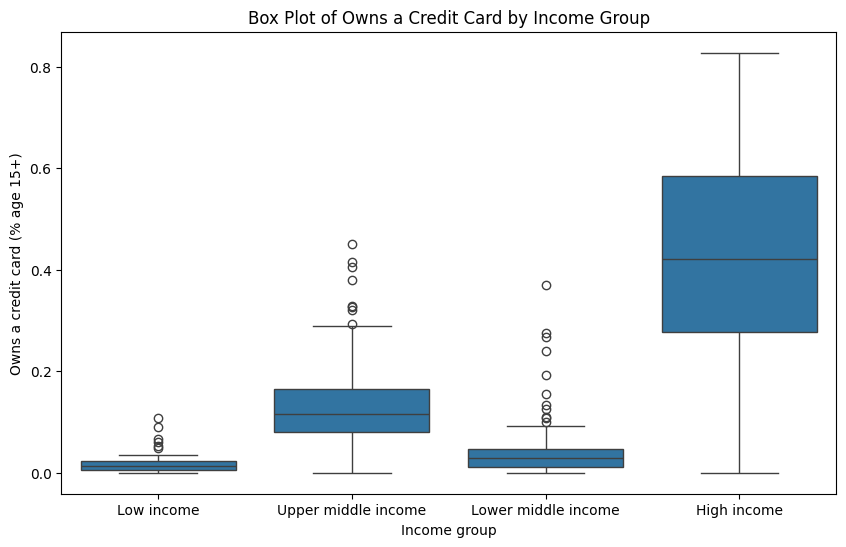

In [ ]:
plt.figure(figsize=(10, 6)) # Creates a figure for plotting with specific dimensions.
sns.boxplot(data=data_na, x='Income group', y='Owns a credit card (% age 15+)').set_title('Box Plot of Owns a Credit Card by Income Group') # Creates a box plot to visualize credit card ownership by income group.

The resulting plot illustrates the median, quartiles, and outliers of credit card ownership rates across different income groups, including low income, lower middle income, upper middle income, and high income. Each box in the plot represents the interquartile range (IQR), which spans from the first quartile (Q1) to the third quartile (Q3), with the line inside the box indicating the median value. The "whiskers" extend up to 1.5 times the IQR, and any data points outside this range are considered outliers, which are displayed as circles.

The plot reveals that high-income individuals tend to have a higher rate of credit card ownership, as indicated by the elevated position and larger size of the box for the high-income group. In contrast, low-income groups exhibit significantly lower rates of credit card ownership, with many outliers reflecting greater variability in ownership rates within this group.

Now we can clean the data based on boxplot of the outliers

In [ ]:
# outlier cleaning
from scipy.stats import zscore
# Calculate Z-scores
z_score = zscore(data_na['Owns a credit card (% age 15+)']) # Calculates the Z-scores for the credit card ownership data.
z_score

,Owns a credit card (% age 15+)
0,-0.846374
1,-0.819394
2,-0.834915
3,-0.886143
4,-0.375956
...,...
567,-0.788242
568,-0.574791
569,-0.798079
570,-0.821531


The table shown above corresponds to the calculated Z-scores for each data point in the column, ranging between approximately -0.37 to -0.88. These values indicate that the data points are within less than one standard deviation from the mean.

In [ ]:
#data_cleaned = data_na[~data_na["Z_score_Owns_Credit_Card"]]
data_na['Z_score_Owns_Credit_Card'] = stats.zscore(data_na['Owns a credit card (% age 15+)'].dropna()) # Adds a new column with Z-scores for the credit card ownership data.

# Display the new column with Z-scores
data_na[['Income group', 'Owns a credit card (% age 15+)', 'Z_score_Owns_Credit_Card']].head()

,Income group,Owns a credit card (% age 15+),Z_score_Owns_Credit_Card
0,Low income,0.008257,-0.846374
1,Low income,0.013859,-0.819394
2,Low income,0.010637,-0.834915
3,Low income,0.000000,-0.886143
4,Upper middle income,0.105931,-0.375956


In the output, as shown in the image, the first few rows of the DataFrame display three columns. The first column represents the income group, such as "Low income" and "Upper middle income." The second column shows the percentage of people who own a credit card in each income group. The third column provides the Z-scores of the credit card ownership percentages, indicating how far each value is from the mean in terms of standard deviations.

This Z-score information is useful for identifying potential outliers. Typically, values with a Z-score greater than 3 or less than -3 are considered outliers, as they deviate significantly from the mean. In this code we have used the intervals 1 to -1. This information can be utilized to clean the data by filtering out such outliers.

In [ ]:
#finds the quartile
Q1 = data_na['Owns a credit card (% age 15+)'].quantile(0.25) # Calculates the 25th percentile (Q1).
Q3 = data_na['Owns a credit card (% age 15+)'].quantile(0.75) # Calculates the 75th percentile (Q3).
IQR = Q3 - Q1 #the range that the middle 50% of data lies, and is called interquartile range (IQR).

#calculating lower and upper bounds
lower_bound = Q1 - 1.5 * IQR # Calculates the lower bound for detecting outliers.
upper_bound = Q3 + 1.5 * IQR # Calculates the upper bound for detecting outliers.

# Create a new column in the dataset to flag outliers (True if outlier, False otherwise)
data_na['outliers_owns_credit_card'] = (data_na['Owns a credit card (% age 15+)'] < lower_bound) | (data_na['Owns a credit card (% age 15+)'] > upper_bound)

# Count and sum of outliers
print("Number of outliers:", data_na['outliers_owns_credit_card'].sum())

Number of outliers: 20


There has been created a new column that flags each data point as either not an outlier (FALSE) or as an outlier (TRUE) based on wether the value is below the lower bound or above the upper bound. Lastly the number of outliers is summed, and we can see that there are 20 outliers in the dataset.

Before the EDA and visualization there will be made some basic statistics for the key variables that will be mainly used in the analysis. This way patterns and trends of the dataset can be presented and considered for later uses.

sample

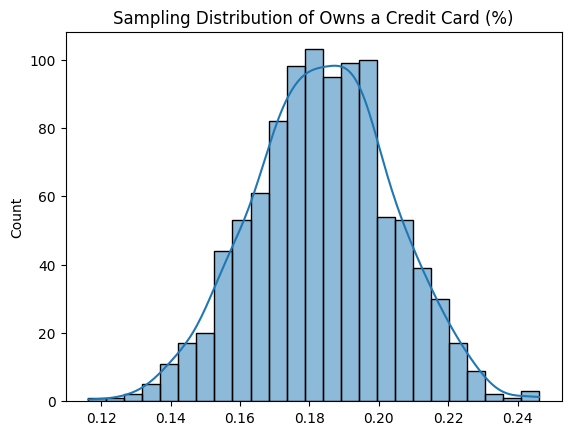

In [ ]:
sample_means = [] # Initializes an empty list to store sample means.

for _ in range(1000): #Loops 1,000 times to draw samples and calculate means.
    sample = data_na['Owns a credit card (% age 15+)'].dropna().sample(100, replace=True) # Draws a random sample of 100 values with replacement.
    sample_mean = sample.mean() # Calculates the mean of each sample.
    sample_means.append(sample_mean) # Appends the sample mean to the list.

sns.histplot(sample_means, kde=True).set_title('Sampling Distribution of Owns a Credit Card (%)') # Creates a histogram and KDE plot of the sample means.
plt.show() # Displays the plot


The resulting plot shows the sampling distribution of the sample means. This code generates a histogram of 1,000 sample means, visually illustrating the sampling distribution for the percentage of people who own a credit card. According to the Central Limit Theorem (CLT), regardless of the distribution of the underlying population, the distribution of sample means will tend to be normally distributed (bell-shaped) as the sample size increases, which is what you observe in the histogram. The more samples you take, the more the distribution of sample means will resemble a normal distribution, centered around the true population mean.

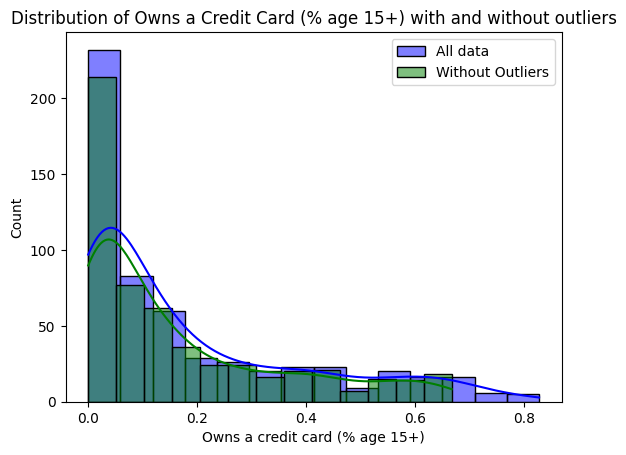

In [ ]:
# Plot the distribution of the "Owns a credit card" data with and without outliers
sns.histplot(data_na['Owns a credit card (% age 15+)'], kde=True, color='blue', label='All data') # Plots the histogram of the full dataset (including outliers).
sns.histplot(data_na.loc[~data_na['outliers_owns_credit_card'], 'Owns a credit card (% age 15+)'], kde=True, color='green', label='Without Outliers') # Plots the histogram of the data without outliers.
plt.title('Distribution of Owns a Credit Card (% age 15+) with and without outliers') # Adds a title to the plot
plt.legend() # Adds a legend to the plot.
plt.show() # Displays the plot.


The blue histogram and KDE curve represent the distribution of the full dataset, including outliers. The presence of extreme values on the right side of the graph causes the tail to extend further in that direction. In contrast, the green histogram and KDE curve display the data without outliers. After removing the outliers, the distribution becomes narrower and more concentrated around the lower values, providing a clearer picture of the central tendency.

This comparison highlights the significant impact outliers have on the distribution. The overall shape of the data is skewed by these extreme values, particularly in the higher range of credit card ownership rates. By removing the outliers, the distribution becomes more focused, allowing the underlying patterns within the majority of the data to be more easily observed.

Afterwards we take a look at the range of values, variance and standard deviation.

In [ ]:
#variance, range and standard diviation
range_owns_credit_card = data_na['Owns a credit card (% age 15+)'].max() - data_na['Owns a credit card (% age 15+)'].min() # Calculates the range (max - min) of credit card ownership.
std_dev_owns_credit_card = data_na['Owns a credit card (% age 15+)'].std() # Calculates the standard deviation of credit card ownership.
variance_owns_credit_card = data_na['Owns a credit card (% age 15+)'].var() # Calculates the variance of credit card ownership.

range_owns_credit_card, std_dev_owns_credit_card, variance_owns_credit_card

(0.8273861408233643, 0.20781564155462187, 0.043187340874759075)

The code calculates the range, standard deviation, and variance for the 'Owns a credit card (% age 15+)' data, providing insight into its spread.

The range, approximately 0.827, indicates an 82.7% difference between the highest and lowest credit card ownership rates. The standard deviation, around 0.208, shows that ownership rates vary by about 20.8% from the mean. Variance, the square of the standard deviation, is approximately 0.043.

These metrics suggest significant variability in credit card ownership, with a wide range and moderate dispersion around the mean.

From there we take a look at kurtosis and skewness of the distribution. This will provide infomation of the tails of the distribution and how spread the observations are.

In [ ]:
# Calculates the kurtosis, a measure of "tailedness" of the distribution.
kurtosis_owns_credit_card = data_na['Owns a credit card (% age 15+)'].kurtosis()
kurtosis_owns_credit_card

0.4843777063868093

*(Kurtosis with a value k > 3 = leptokurtic, k = 3 = mesokurtic and k < 3 platykurtic)*
The value we get is 0.484, and will therefore be platykurtic and have less extreme values (outliers).

In this case, the kurtosis value is approximately 0.484, which is slightly positive. This suggests that the distribution has marginally heavier tails and a slightly sharper peak than a normal distribution. However, the kurtosis is not extreme, so the data is not significantly skewed toward outliers. It indicates a near-normal distribution with some moderate outliers in the dataset.

In [ ]:
# Calculates the skewness, a measure of asymmetry in the distribution.
skewness_owns_credit_card = data_na['Owns a credit card (% age 15+)'].skew()

skewness_owns_credit_card

1.259387365334288

skewness show how the distribution is tailed where a positive value is a right side skew and a negative value mean left side skew Example: positive value skewness on age distribution = more young people and less older people

In this case, the skewness value is approximately 1.259, which indicates a positive skew. This means that the distribution of credit card ownership rates is right-skewed—most of the data points are concentrated on the lower end, but there are a few higher values (extreme high ownership rates) that pull the tail of the distribution to the right. This suggests that while many individuals may have lower credit card ownership rates, there are some with significantly higher rates.

# Bivariate analysis:
This part of the analysis will look at how two different variables of the dataset interact and what relationships they have.
First we look at what the Spearman's Rank correlation coefficient is. This will allow us to understand the monotonic relationship between two variables is a positively, negatively or does not exist.



In [ ]:
# assign unique integer to income group
Income_group_mapping = {
    'High income': 0,
    'Low income': 1,
    'Lower middle income': 2,
    'Upper middle income': 3
} # A dictionary is created to map each income group to a unique integer: 'High income' is assigned 0,'Low income' is assigned 1, Lower middle income' is assigned 2, 'Upper middle income' is assigned 3.
data_na['Income_group_dummy'] = data_na['Income group'].map(Income_group_mapping) # The .map() function is used to apply the Income_group_mapping to the 'Income group' column in the DataFrame data_na. This creates a new column called 'Income_group_dummy' where each income group is replaced with its corresponding integer value (as defined in the dictionary).

# Calculate Pearson's correlation coefficient
pearson_corr = data_na['Income_group_dummy'].corr(data_na['Owns a credit card (% age 15+)'], method='pearson') # This line calculates Pearson’s correlation coefficient between the numerical income group (in the 'Income_group_dummy' column) and the percentage of people who own a credit card (in the 'Owns a credit card (% age 15+)' column). The method='pearson' argument specifies that Pearson's correlation is used, which measures the linear relationship between the two variables.
print(f"Pearson's Correlation Coefficient between Income group and Owns a credit card (% age 15+): {pearson_corr:.2f}")

# Calculate Spearman's rank correlation coefficient
spearman_corr = data_na['Income_group_dummy'].corr(data_na['Owns a credit card (% age 15+)'], method='spearman') # This line calculates Spearman’s rank correlation coefficient between the same two variables. The method='spearman' argument specifies that Spearman’s rank correlation is used, which measures the strength and direction of the monotonic relationship between the two variables, without assuming linearity.
print(f"Spearman's Rank Correlation Coefficient between Income group and Owns a credit card (% age 15+): {spearman_corr:.2f}")

Pearson's Correlation Coefficient between Income group and Owns a credit card (% age 15+): -0.60
Spearman's Rank Correlation Coefficient between Income group and Owns a credit card (% age 15+): -0.40


Pearson’s correlation measures the linear relationship between two continuous variables. In this case, it calculates the correlation between the numerical representation of the income group and the percentage of people who own a credit card.
A Pearson correlation coefficient of -0.60 indicates a moderate to strong negative linear relationship. This suggests that as income level increases (moving from 1, 2, 3 to 0), the likelihood of owning a credit card tends to increase (as the negative sign indicates that higher income groups have a higher likelihood of owning a credit card).

Spearman’s correlation measures the monotonic relationship (i.e., the consistency of ranking) between two variables. It assesses whether an increase in one variable corresponds to a consistent increase or decrease in the other, without assuming a linear relationship.
A Spearman correlation coefficient of -0.40 indicates a weaker negative monotonic relationship compared to Pearson’s. This suggests that as the income group increases (numerically from high to low income), the percentage of people who own a credit card tends to decrease, but the relationship is less strictly linear compared to Pearson’s correlation.

Correlation between the different variables,

In [ ]:
correlation_matrix = data_na[['Income_group_dummy','Owns a credit card (% age 15+)','Account (% age 15+)','Paid off all credit card balances in full by their due date (% age 15+)']].corr(method='spearman') # This line selects four columns from the data_na DataFrame. The .corr(method='spearman') function calculates Spearman's rank correlation for these variables. Spearman's correlation measures the strength and direction of the monotonic relationship between the variables, meaning how well the variables' rankings relate to each other.
correlation_matrix # This line outputs the resulting Spearman correlation matrix, which shows the pairwise correlation coefficients between all selected variables.

,Income_group_dummy,Owns a credit card (% age 15+),Account (% age 15+),Paid off all credit card balances in full by their due date (% age 15+)
Income_group_dummy,1.000000,-0.396168,-0.444505,-0.250200
Owns a credit card (% age 15+),-0.396168,1.000000,0.841880,0.100308
Account (% age 15+),-0.444505,0.841880,1.000000,0.087125
Paid off all credit card balances in full by their due date (% age 15+),-0.250200,0.100308,0.087125,1.000000


Diagonal Values (1.000) represent the correlation of each variable with itself, so they are always 1.0.

The correlation between 'Income_group_dummy' and 'Owns a credit card (% age 15+)' is -0.396, meaning there is a moderate negative relationship. This suggests that as the income group number increases (from high income to lower income), the percentage of credit card ownership decreases.

The correlation between 'Income_group_dummy' and 'Account (% age 15+)' is -0.444, indicating a slightly stronger negative relationship. Higher income groups tend to have more financial accounts.

Similarly, 'Income_group_dummy' has a weaker negative correlation of -0.250 with 'Paid off all credit card balances in full by their due date (% age 15+)', meaning that higher-income groups are more likely to pay off credit card balances in full.

There is a strong positive correlation (0.839) between 'Owns a credit card (% age 15+)' and 'Account (% age 15+)'. This suggests that individuals who own a credit card are also likely to have a financial account.

The correlation between 'Owns a credit card (% age 15+)' and 'Paid off all credit card balances in full by their due date (% age 15+)' is positive but much weaker (0.100). This indicates that while there is some relationship, owning a credit card does not strongly correlate with paying off balances in full.

Similarly, the relationship between 'Account (% age 15+)' and 'Paid off all credit card balances in full' is very weak (0.086).

Overall, the correlation matrix shows moderate to strong relationships between income group and financial behaviors, especially between owning a credit card and having an account. Higher-income individuals are more likely to have both financial accounts and credit cards, and income correlates weakly with paying off balances in full.

Text(0.5, 1.0, 'Correlation Matrix of credit card holders')

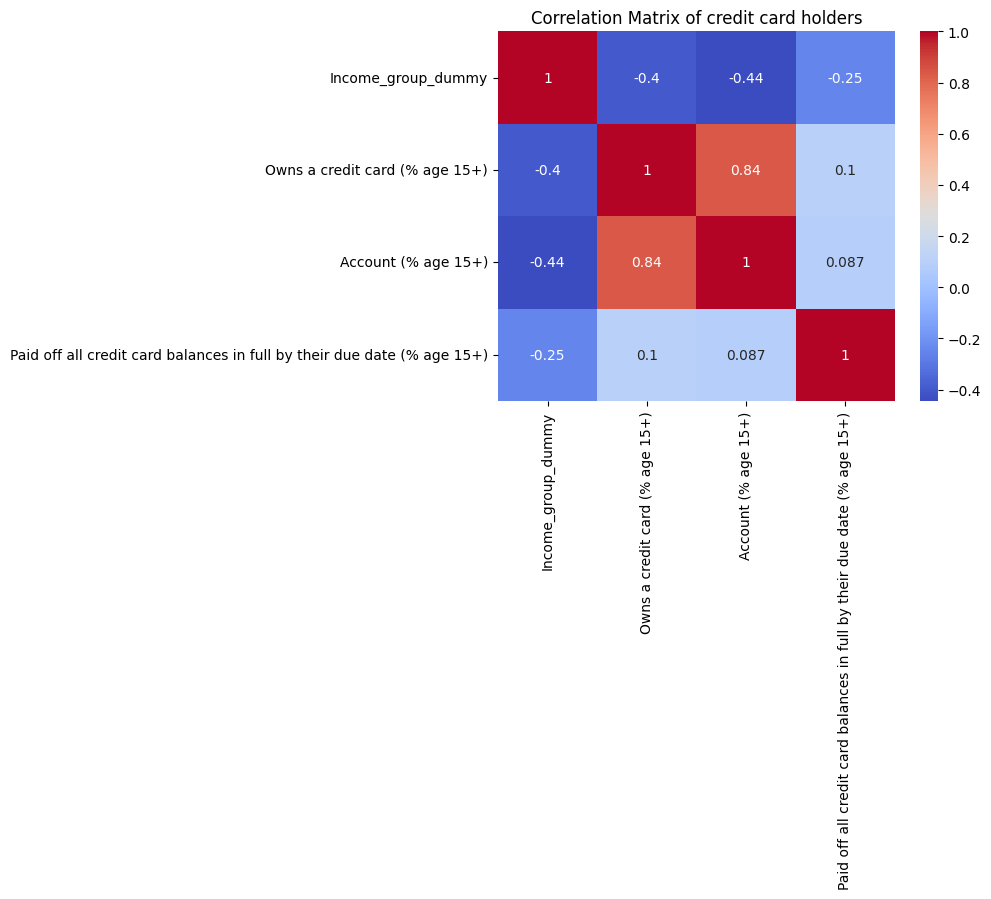

In [ ]:
# Visualizing the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm').set_title('Correlation Matrix of credit card holders')
# This line uses the seaborn library to create a heatmap of the correlation matrix. Here’s what each argument does: correlation_matrix: This is the data that will be plotted (the correlation values between the variables). annot=True: This displays the actual correlation values in each cell of the heatmap. cmap='coolwarm': This sets the color map to "coolwarm," where red shades represent strong positive correlations, and blue shades represent strong negative correlations. Lighter shades indicate weaker correlations. .set_title('Correlation Matrix of credit card holders'): This adds a title to the heatmap, making it clear that the matrix represents the correlations between variables related to credit card holders.

The code provided creates a heatmap to visually represent the correlation matrix, showing the strength and direction of relationships between different variables related to credit card holders. The purpose of the heatmap is to provide a quick and visual understanding of the relationships between these variables. It highlights the strength and direction of each correlation, making it easier to identify patterns and connections within the dataset.

The heatmap's color scale on the right helps to interpret the correlations. Red values near 1.0 indicate a strong positive correlation, meaning that as one variable increases, the other also increases. Blue values near -1.0 show a strong negative correlation, where an increase in one variable leads to a decrease in the other. Lighter shades, close to 0, represent weaker or no correlation. The diagonal values, all 1.0, show that each variable is perfectly correlated with itself, indicated by dark red.

There are several key insights from the heatmap. First, there is a moderate negative correlation (-0.4) between the income group (represented by Income_group_dummy) and owning a credit card. This suggests that higher-income groups, with lower numerical values in the Income_group_dummy, are more likely to own a credit card. Additionally, there is a strong positive correlation (0.84) between owning a credit card and having a financial account, implying that individuals who own a credit card are very likely to also have a financial account. On the other hand, the weakest correlations are between credit card ownership and paying off balances on time, as well as between account ownership and paying off credit card balances in full, both hovering around 0.1. This indicates that these relationships are minimal.

# Analysis of Factors influencing owning a credit card
In this analysis we want to analyse how owning a credit card depends on income level, population and region. We take a perspective in lecture M1_stats_intro_solutions exercise 12.

In [ ]:
#Necessry packages is imported:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy.stats import shapiro

In [ ]:
#Taking the data and cleaning
data_na = cleaned_data.fillna({
    'First financial institution account ever was opened to receive a wage payment or money from the government (% age 15+)': cleaned_data['First financial institution account ever was opened to receive a wage payment or money from the government (% age 15+)'].mean(),
    'Used a credit card: in-store (% age 15+)': cleaned_data['Used a credit card: in-store (% age 15+)'].median(),
    'Paid off all credit card balances in full by their due date (% age 15+)': cleaned_data['Paid off all credit card balances in full by their due date (% age 15+)'].mean(),
    'Owns a credit card (% age 15+)': cleaned_data['Owns a credit card (% age 15+)'].fillna(0)
})

In [ ]:
#Defining dependent and independent variables
X = data_na[['Income group', 'Region', 'Adult populaiton']]
y = data_na['Owns a credit card (% age 15+)']

In [ ]:
# is used to convert categorical variables in the dataset X into numerical format
X = pd.get_dummies(X, drop_first=True)

In [ ]:

X = sm.add_constant(X) # This line adds a constant (intercept) term to the matrix X. includes a term representing the bias or intercept, which can improve model accuracy.
X = X.astype(int) # converts all the values in the matrix X to integers. can be useful in cases where X contains float values that need to be represented as integers
X

,const,Adult populaiton,Income group_Low income,Income group_Lower middle income,Income group_Upper middle income,Region_Europe & Central Asia (excluding high income),Region_High income,Region_Latin America & Caribbean (excluding high income),Region_Middle East & North Africa (excluding high income),Region_South Asia,Region_Sub-Saharan Africa (excluding high income)
0,1,15124473,1,0,0,0,0,0,0,1,0
1,1,17300802,1,0,0,0,0,0,0,1,0
2,1,19718214,1,0,0,0,0,0,0,1,0
3,1,22647496,1,0,0,0,0,0,0,1,0
4,1,2258899,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
567,1,10291819,0,1,0,0,0,0,0,0,1
568,1,7414228,0,1,0,0,0,0,0,0,1
569,1,7712326,0,1,0,0,0,0,0,0,1
570,1,8044282,0,1,0,0,0,0,0,0,1


In [ ]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                  OLS Regression Results                                  
Dep. Variable:     Owns a credit card (% age 15+)   R-squared:                       0.692
Model:                                        OLS   Adj. R-squared:                  0.687
Method:                             Least Squares   F-statistic:                     139.5
Date:                            Fri, 06 Sep 2024   Prob (F-statistic):          1.36e-136
Time:                                    06:46:47   Log-Likelihood:                 421.67
No. Observations:                             568   AIC:                            -823.3
Df Residuals:                                 558   BIC:                            -779.9
Df Model:                                       9                                         
Covariance Type:                        nonrobust                                         
                                                                coef    std err          t

This code performs an Ordinary Least Squares (OLS) regression analysis and then prints a summary of the regression results

'Owns a credit card (% age 15+)' is the dependent variable, which means that we are modeling the percentage of people who own a credit card based on the independent variables.

R-squared (0.692) indicates that approximately 69.2% of the variance in the dependent variable is explained by the independent variables. A value closer to 1 indicates a better fit.

Adj. R-squared (0.687) accounts for the number of predictors in the model. It penalizes adding unnecessary variables that do not improve the model's performance. Here, the adjusted value is slightly lower than the R-squared, indicating a good fit but accounting for the complexity of the model.

F-statistic (139.5) and Prob (F-statistic) (1.36e-136) which tests the overall significance of the regression model. A low p-value (close to zero) suggests that at least one of the predictors is statistically significant.

The constant (intercept) term is 0.1083. This is the predicted value of the dependent variable when all independent variables are zero.

The Adult population (1.416e-10) variable has a positive coefficient, meaning as the adult population increases, the percentage of people owning a credit card increases. The p-value is very small (0.001), indicating it is statistically significant.

The Income group_Low income (-0.1006) negatively affects credit card ownership, and it is statistically significant (p-value = 0.000).

The Region_High income (0.3196) indicates a significantly higher credit card ownership rate compared to the reference region.

Omnibus (31.293) and Prob(Omnibus) (0.000) checks for the normality of the residuals. A p-value of 0.000 suggests that the residuals are not normally distributed.

Durbin-Watson (0.842) tests for autocorrelation in the residuals. A value close to 2 indicates no autocorrelation, while values close to 0 or 4 suggest positive or negative autocorrelation, respectively. Here, 0.842 suggests some positive autocorrelation in the residuals.

Jarque-Bera (84.780) and Prob(JB) (3.89e-19) test for normality and a low p-value also indicates that the residuals are not normally distributed.

Kurtosis (4.847) measures the "tailedness" of the residual distribution. A value greater than 3 indicates heavy tails, meaning more extreme values than a normal distribution.

Cond. No. (3.58e+23) measures multicollinearity in the independent variables. A very high value (such as this result) suggests the presence of strong multicollinearity, meaning some of the independent variables are highly correlated.

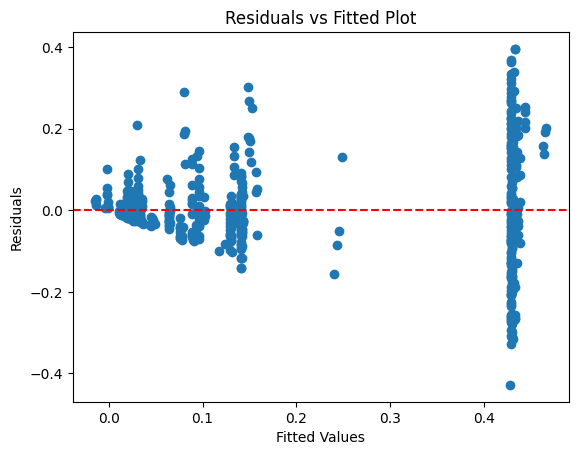

In [ ]:
residuals = results.resid
fitted_vals = results.fittedvalues
plt.scatter(fitted_vals, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Plot')
plt.show()

The plot above shows that the data has some clustering of residuals around specific fitted values. Ad we can se around 0.4 there is a lot of clustering, which suggests that the model may not be evenly predicting across all ranges of the dependent variable. Moreover, the residuals are not perfectly scattered around the red line, indicating potential issues such as non-linearity or heteroscedasticity

The code performs the Breusch-Pagan test for heteroscedasticity in the residuals of the regression model, which checks whether the variance of the residuals is constant across all levels of the independent variables. Heteroscedasticity is a violation of one of the key assumptions of linear regression, which assumes that the variance of the residuals should be constant.

In [ ]:
#Breusch-Pagan test for heteroscedasticity
_, pval, _, _ = het_breuschpagan(residuals, X)
print(f"Breusch-Pagan p-value: {pval}")

Breusch-Pagan p-value: 4.054499325446991e-34


The p-value shows a small p-value which indicates that we reject the null hypothesis of homoscedasticity. In other words, there is strong evidence of heteroscedasticity in the model.

The code calculates the Durbin-Watson statistic, which is used to test for autocorrelation in the residuals of a regression model

In [ ]:
# Independence of Residuals
print("Durbin-Watson statistic:", sm.stats.durbin_watson(residuals))

Durbin-Watson statistic: 0.8424681946798964


This value is much closer to 0 than to 2, which indicates positive autocorrelation in the residuals. In other words, there is a tendency for the residuals to be correlated, which violates the assumption of independence of residuals in linear regression. Moreover, it suggests that errors are related to one another, and the model may not be fully capturing all of the systematic patterns in the data.

In [ ]:
#Multicollinearity check using Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data['Feature'] = X.columns
print(vif_data)

         VIF                                            Feature
0   0.000000                                              const
1   1.206924                                   Adult populaiton
2        inf                            Income group_Low income
3        inf                   Income group_Lower middle income
4        inf                   Income group_Upper middle income
5   3.216177  Region_Europe & Central Asia (excluding high i...
6        inf                                 Region_High income
7   2.761616  Region_Latin America & Caribbean (excluding hi...
8   1.998837  Region_Middle East & North Africa (excluding h...
9   1.649806                                  Region_South Asia
10  4.383254  Region_Sub-Saharan Africa (excluding high income)


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


The high multicollinearity shows that the data is highly correlated with eachother.

